In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

In [30]:
def emission_height(P, hmin, hmax, ncomp):
    """Function to determine the emission heights given hmin and hmax. Allowed emision heights for young 
       pulsars range between [950, 1000] and between [20, 1000] for old pulsars.
    
       Args:
       -----
       P      : rotational period.
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp  : integer number of component .
       
       Returns:
       --------
       H      : random emission height.
    """
    
#   num_H = np.random.randint(3,8), number of discrete emission height 
    num_H = ncomp
    
#   emission height for a short period pulsar: only one emission height 
    if P <= 0.15:
        if hmin >= 950 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=1)
            
        else: print "error, emission range not allowed for pulse period P < 0.15 seconds"
            
#   emission height for a long period pulsar:        
    if P > 0.15:
        if hmin >= 20 and hmax <= 1000:
            H = np.random.uniform(hmin, hmax, size=num_H)
        
        else: print "error, emission range not allowed for pulse period P > 0.15 seconds"
        
    return H

########################### simple test #############################
if __name__ == "__main__":
    P = 0.16
    hmin = 50
    hmax = 1000
    ncomp = 5
    heights = emission_height(P, hmin, hmax, ncomp)
    print heights  

[ 296.56158304   91.67284005  649.88187558  216.08465905  613.43120525]


In [31]:
import mapphi as mp
def los(alpha, beta):
    """Function to determine the line of sight cut across the beam.
    
       Args:
       -----
       alpha       : inclination angle
       beta        : impact parameter
       
       Returns:
       --------
       xlos        : the line of sight x-coordinates
       ylos        : the line of sight y-coordinates
       avgthetalos : the line of sight angle in degrees
    """

#   rotational phase:
    phi = np.linspace(-180, 180, num=360, endpoint=True)
    
#   line of sight x,y plane:
    xlos, ylos = mp.mapphi(alpha, beta, phi)
    thetalos = np.arctan2(ylos, xlos) * (180 / np.pi) - 90.0
    for i in np.arange(len(thetalos)):
        if thetalos[i] < 0:
            thetalos[i] = -thetalos[i]
            
#   find the average thetalos
    avgthetalos = np.average(thetalos)
    
    return xlos, ylos, avgthetalos
################## test ######################
if __name__ == "__main__":
    alpha = 90
    beta = 30
    xlos, ylos, avgthetalos = los(alpha, beta)
    print avgthetalos, xlos

46.2166572138 [ 150.          149.91594474  149.66456048  149.24817193  148.67058865
  147.93701093  147.05390436  146.02884891  144.87036922  143.58775291
  142.19086425  140.6899594   139.09550924  137.41803438  135.66795615
  133.85546596  131.99041447  130.08222102  128.13980285  126.17152309
  124.18515592  122.18786703  120.18620744  118.1861184   116.19294553
  114.21146016  112.24588613  110.29993059  108.37681727  106.47932134
  104.60980465  102.7702508   100.96229935   99.18727878   97.44623779
   95.73997484   94.06906571   92.43388906   90.83464994   89.27140137
   87.74406396   86.25244365   84.79624781   83.37509961   81.988551
   80.63609415   79.31717176   78.03118607   76.77750693   75.5554788
   74.36442696   73.20366292   72.07248908   70.97020289   69.89610029
   68.8494788    67.82964009   66.83589217   65.86755126   64.92394334
   64.00440544   63.1082867    62.23494919   61.38376863   60.55413485
   59.7454522    58.95713981   58.18863174   57.43937705   56.7088

In [32]:
from scipy import constants
#import emission_height

def rho(P, heights):
    """Function to determine the opening angle rho given the rotational period and emission height.
       
    
       Args:
       -----
       P   : rotational period (seconds)
       H   : emission height (km)
       
       Returns:
       --------
       rho : the opening angle (degrees)
       
    """

#   opening angle (eqn 3.29, Lorimer and Kramer 2005):
    rho = np.rad2deg(np.sqrt((9 * np.pi * heights) / (2 * (constants.c / 1000) * P)))   
    
    return rho

#################### simple test #####################################
if __name__ == "__main__":
    opa = rho(P, heights)
    print opa

[ 16.93912327   9.4178946   25.07556316  14.45923947  24.36219501]


In [33]:
def patch_width(P, heights):
    """Function to calculate the width of a patchy emission region 
       within a pulsar beam at a given height.
    
       Args:
       -----
       P             : rotational period (seconds).
       hmin          : minimum emission height (in km).
       hmax          : maximum emission height (in km).
       npatch        : integer number of emission patches.
       
       Returns:
       --------
       patchwidths   : the width of the patchy emission region (degrees).
       
    """   
    
#   width of the patch (eqn 3, KJ2007):
    patchwidths = 2.45 * 0.2 * np.sqrt(heights / ( 10 * P)) 
    
    return patchwidths
#################### simple test ################################################
if __name__ == "__main__":
    patchwidths = patch_width(P, heights)
    print patchwidths



[ 6.67103984  3.70899657  9.87536829  5.69440112  9.59442652]


In [34]:
def patch_center(P, heights):
    """Function find centres of the patches
       
       Args:
       -----
       P      : rotatinal period
       hmin   : minimum emission height (in km).
       hmax   : maximum emission height (in km).
       ncomp : number of emission components
       
       
       Returns:
       --------
       patch_centerx : the patch center projection on the x-axis 
       patch_centery : the patch center projection on the y-axis 
    """
    
#   opening angle:    
    opa = rho(P, heights) 
    
#   initialize the array:
    centerx = []
    centery = []
    
    for comp in opa: #for each emission height (comp!)
#       number of active patches (table 2, KJ2007): 
        npatch = np.random.randint(2,10+1)
        tempCenterX = []
        tempCenterY = []
#       The angle between the axis:
        theta = 2 * np.pi * np.random.random(npatch)

#       for short periods:
        if P <= 0.15:
            if hmin >= 950 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
                
#       for longer periods:
        if P > 0.15:
            if hmin >= 20 and hmax <= 1000:
                for i in np.arange(npatch):
                    tempCenterX.append(comp * np.sin(theta[i]))
                    tempCenterY.append(comp * np.cos(theta[i]))
        centerx.append(tempCenterX)
        centery.append(tempCenterY)
        
    return centerx, centery

########################### simple test ###########################
if __name__ == "__main__":
    cx, cy = patch_center(P, heights)
    for i in range(len(cx)):
        print 'height %i:\n'%i, cx[i], '\n', cy[i], '\n'

height 0:
[-16.93784504289836, -15.610949658643161] 
[0.20809243436454808, 6.5751158099143243] 

height 1:
[1.6116364421156737, 1.9478953358112696, 2.4833297554498017, 7.3951880899761981, 9.4069865874690919, -1.6181156018410912, -4.8320431945003977, 9.2597967527360368, 8.8647346838026007] 
[9.2789744446427633, -9.2142521414715706, -9.0845920156926336, 5.8316320082600308, 0.45314689568102057, 9.2778467687803072, -8.0838170026523439, -1.7184012523004888, 3.1801285747082502] 

height 2:
[-24.590476315548177, 10.601199786346656, -17.475114083052137, -12.367969188354689, -4.8685887601617308] 
[-4.9083951006814628, 22.7244016638479, 17.983443932524228, 21.813234653435487, 24.598388389777824] 

height 3:
[0.37512574021316286, 10.701522436763408, -12.832368672740589, 14.426625126443895] 
[-14.45437258180862, -9.7235293793025939, -6.6633265192077475, 0.97061501934031369] 

height 4:
[24.229201355884019, 3.9816061907976508, -22.646617306496793, 22.449588706687901] 
[2.5421147455171513, -24.03462

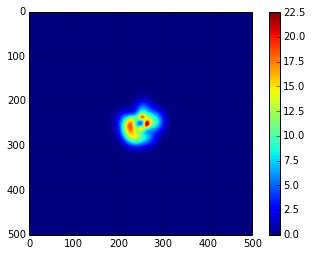

In [44]:
#import d2r
def plotpatch(P, alpha, beta, heights, centerx, centery):
    """Function to plot the patches for a given height range. Using a 2d gaussian
    
       Args:
       -----
       P       : rotational period (seconds)
       alpha   : inclination angle (degrees)
       beta    : impact parameter (degrees)
       hmin    : minimum emission height (in km)
       hmax    : maximum emission height (in km)
       npatch  : number of emission patches
       
       Returns:
       --------
       A plot of the patches projected on to observational plane.
    
    """    
    
#   make a 2D array:
    x = np.linspace(-180, 180, num=500, endpoint=True)
    y = np.linspace(-180, 180, num=500, endpoint=True)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros_like(X)

#   patchcenter or mean of the plot from patch center:
    #cx, cy, theta = patch_center(P, hmin, hmax, npatch)
    #print cx, cy, theta

#   find the width of the patches
    patchwidths = patch_width(P, heights)
    
#   An arbitrary peak of the 2D gaussian:
    peak = 5.
    for cid, comp in enumerate(heights):
#       same xy widths for circular patches:        
        sigmax = patchwidths[cid]
        sigmay = patchwidths[cid]
    
#       center of the patch:
        patchCenterX = centerx[cid]
        patchCenterY = centery[cid]
        
#       2D gaussian:
        for pc in zip(patchCenterX, patchCenterY):
            Z += peak*np.exp(-((X - pc[0])**2 / (2*sigmax**2) + (Y - pc[1])**2 / (2*sigmay**2)))
    
    
    fig1 = plt.figure()    
    #plt.contour(X, Y, Z)
    #plt.xlim(-90, 90)
    #plt.ylim(-90, 90)
    plt.grid()
    plt.imshow(Z)#, cmap=cm.gray)
    plt.colorbar()
   
    
    
############################ simple test ##########################
if __name__ == "__main__":
    alpha = 10
    beta = 1
    plotpatch(P, alpha, beta, heights, cx, cy)